In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [69]:
def draw_hexagonal_lattice(species, hex_radius=1):
    """
    Draws a hexagonal lattice with vertices facing the bottom (pointy-bottom orientation).
    Parameters:
    - species (2D array): Array where each value determines the color of a hexagon.
                          Example: 0 for yellow, 1 for red.
    - hex_radius (float): Radius of each hexagon.
    """
    # Parameters for hexagon dimensions
    hex_width = np.sqrt(3) * hex_radius
    hex_height = 2 * hex_radius

    # Colors for the species
    colors = {0: "white", 1: "red", 2: "yellow", 3: "gray"}

    def hexagon(center_x, center_y, radius):
        """Generate the coordinates of a hexagon centered at (center_x, center_y)."""
        angles = np.linspace(np.pi / 6, 2 * np.pi + np.pi / 6, 7)  # Adjust angles for pointy-bottom
        x = center_x + radius * np.cos(angles)
        y = center_y + radius * np.sin(angles)
        return x, y

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(species.shape[0]):  # Loop over rows
        for j in range(species.shape[1]):  # Loop over columns
            # Calculate the center of the hexagon
            center_x = j * hex_width + (i % 2) * (hex_width / 2)  # Offset every other row
            center_y = -i * (3/4 * hex_height)  # Offset each row
            
            # Get the color from the species array
            color = colors[species[i, j]]
            
            # Draw the hexagon
            x, y = hexagon(center_x, center_y, hex_radius)
            edge_color = "none" if L >= 100 else "black"
            ax.fill(x, y, color=color, edgecolor=edge_color)

    # Set aspect ratio and remove axes for better visualization
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

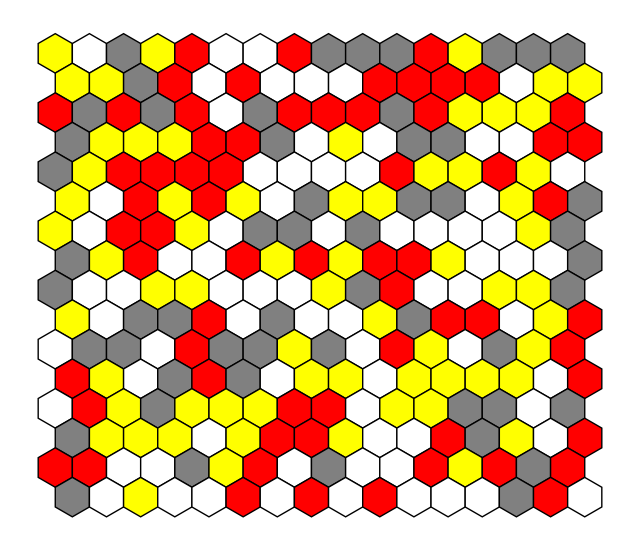

In [32]:
N = 16
species = np.random.choice([0, 1, 2, 3], size=(N, N))
draw_hexagonal_lattice(species)

In [5]:
L = 16
s = 0.5
Gamma_w = 0.01
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.1

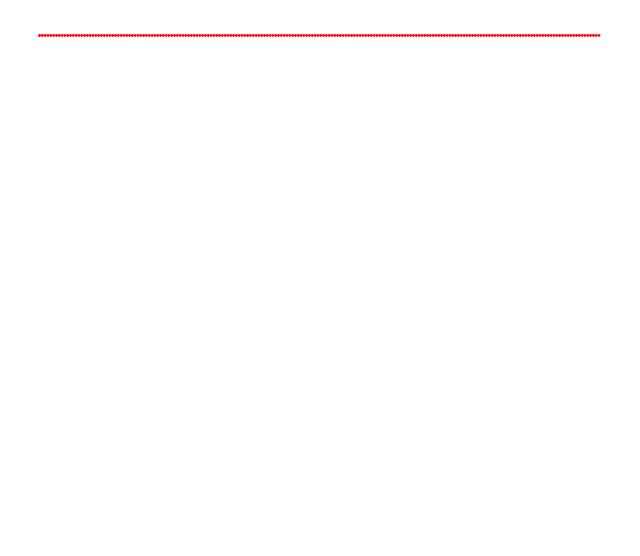

In [70]:
species = np.zeros((L,L), dtype=int); species[0,:] = 1
draw_hexagonal_lattice(species)

In [3]:
def update(species):
    rows, cols = species.shape
    # Define neighbor directions for even and odd rows
    directions_odd = [(-1,  0), (-1, +1), (0, -1), (0, +1), (+1,  0), (+1, +1)]
    directions_even = [(-1, -1), (-1,  0), (0, -1), (0, +1), (+1, -1), (+1,  0)]
    for i in range(rows):
        for j in range(cols):
            flavor = species[i, j]
            if flavor > 0:
                # Visit all neighbors; Choose directions based on the row parity
                directions = directions_even if i % 2 == 0 else directions_odd
                for dr, dc in directions:
                    ni, nj = i + dr, j + dc
                    # Check if the neighbor is within bounds
                    if 0 <= ni < rows and 0 <= nj < cols:  # Boundary check
                        if species[ni, nj] == 0:  # If the neighbor is empty
                            if bool(np.random.binomial(1, Gamma[flavor])): # success in growth
                                if flavor == 1: # wild
                                    if bool(np.random.binomial(1, mu)): # mutate
                                        species[ni, nj] = 2
                                    else:
                                        species[ni, nj] = 1
                                elif flavor == 2: # mutant
                                    species[ni, nj] = 2

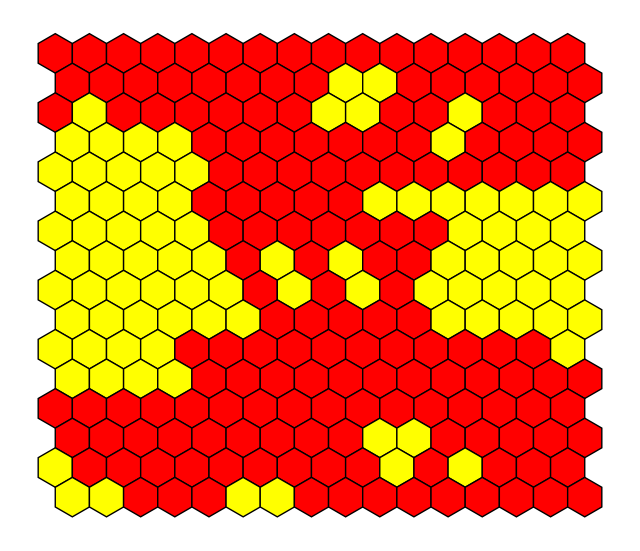

In [460]:
for i in range(10):
    update(species)
draw_hexagonal_lattice(species)

In [405]:
L = 16
s = 0.1
Gamma_w = 0.01
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.05
species = np.zeros((L,L), dtype=int); species[0,:] = 1

In [303]:
for i in range(20):
    update(species)
draw_hexagonal_lattice(species)

IndexError: index 16 is out of bounds for axis 1 with size 16

In [7]:
L = 200
s = 0.3
Gamma_w = 0.1
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.05
species = np.zeros((L,L), dtype=int); species[0,:] = 1

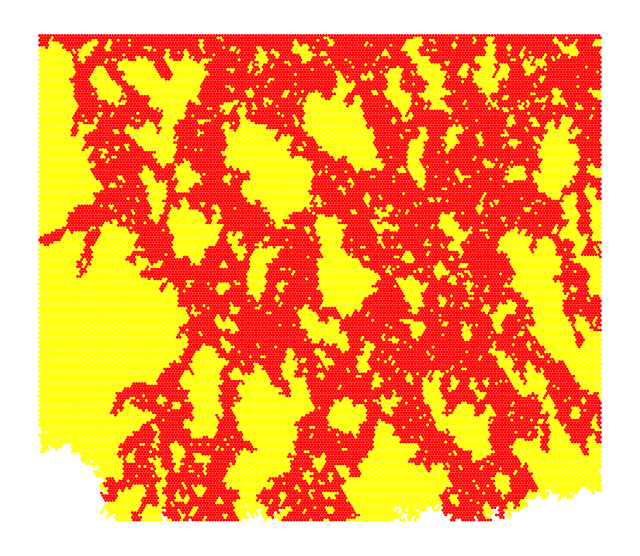

In [12]:
for i in range(200):
    update(species)
draw_hexagonal_lattice(species)

In [13]:
L = 200
s = 0.8
Gamma_w = 0.1
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.05
species = np.zeros((L,L), dtype=int); species[0,:] = 1

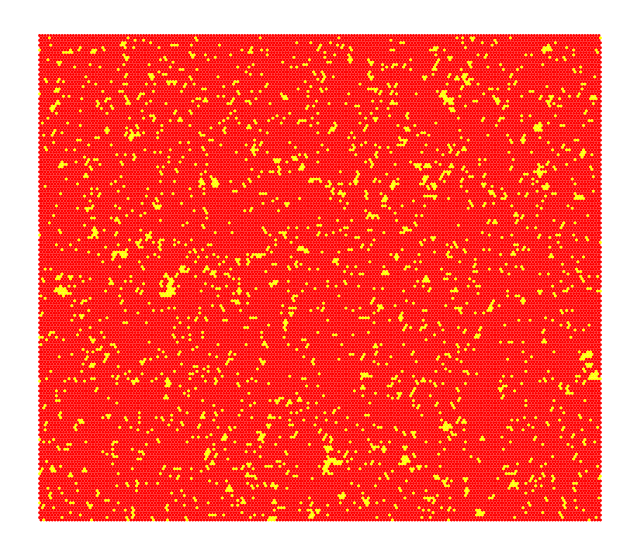

In [14]:
for i in range(500):
    update(species)
draw_hexagonal_lattice(species)

In [16]:
L = 200
s = 0.1
Gamma_w = 0.1
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.05
species = np.zeros((L,L), dtype=int); species[0,:] = 1

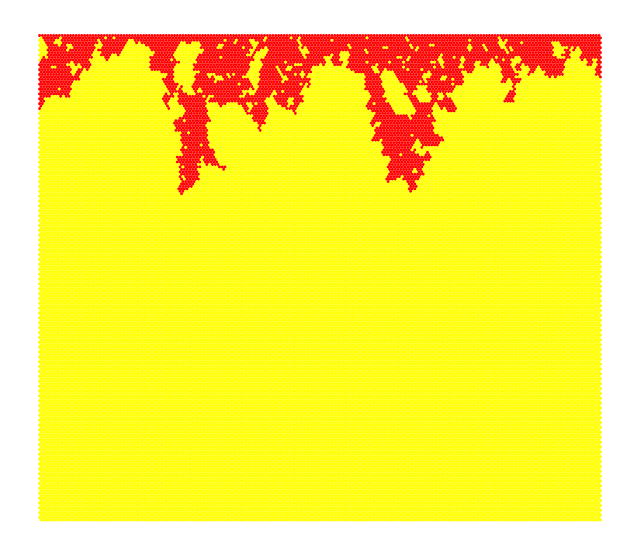

In [19]:
for i in range(500):
    update(species)
draw_hexagonal_lattice(species)

In [ ]:
L = 200
s = 0.3
Gamma_w = 0.1
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.05
species = np.zeros((L,L), dtype=int); species[0,:] = 1

In [ ]:
for i in range(500):
    update(species)
draw_hexagonal_lattice(species)

In [4]:
def update_randomly(species):
    rows, cols = species.shape
    i = np.random.choice(range(rows))
    j = np.random.choice(range(cols))
    flavor = species[i, j]
    # Define neighbor directions for even and odd rows
    directions_odd = [(-1,  0), (-1, +1), (0, -1), (0, +1), (+1,  0), (+1, +1)]
    directions_even = [(-1, -1), (-1,  0), (0, -1), (0, +1), (+1, -1), (+1,  0)]
    # Visit all neighbors; Choose directions based on the row parity
    directions = directions_even if i % 2 == 0 else directions_odd
    if flavor > 0:
        for dr, dc in directions:
            ni, nj = i + dr, j + dc
            # Check if the neighbor is within bounds
            if 0 <= ni < rows and 0 <= nj < cols:  # Boundary check
                if species[ni, nj] == 0:  # If the neighbor is empty
                    if bool(np.random.binomial(1, Gamma[flavor])): # success in growth
                        if flavor == 1: # wild
                            if bool(np.random.binomial(1, mu)): # mutate
                                species[ni, nj] = 2
                            else:
                                species[ni, nj] = 1
                        elif flavor == 2: # mutant
                            species[ni, nj] = 2

In [5]:
L = 200
s = 0.1
Gamma_w = 0.5
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
mu = 0.01
species = np.zeros((L,L), dtype=int); species[0,:] = 1

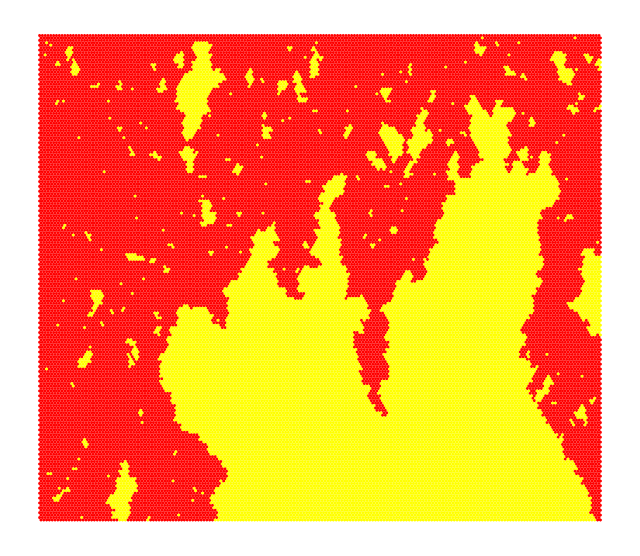

In [19]:
for i in range(5000000):
    update_randomly(species)
draw_hexagonal_lattice(species)

In [49]:
def generate_hotspots(form, R, phi):
    """
    Generates hotspots on a hexagonal lattice.
    Parameters:
    - L (int): Size of the hexagonal lattice (LxL).
    - R (int): Radius of each hotspot (1 = center only, 2 = up to second shell, etc.).
    - phi (float): Filling fraction (fraction of total lattice covered by hotspots).
    Returns:
    - 2D numpy array (LxL): Marked lattice with hotspots.
    """
    rows = form.shape[0]
    cols = form.shape[1]
    lattice = np.zeros((rows, cols), dtype=int)
    num_hotspots = int(phi * rows*cols / R**2 / 3)
    

    # Generate random hotspot centers
    hotspot_centers = []
    while len(hotspot_centers) < num_hotspots:
        cx, cy = np.random.randint(0, rows), np.random.randint(0, cols)
        if (cx, cy) not in hotspot_centers: # no exact overlap
            hotspot_centers.append((cx, cy))

    # Convert (row, col) to axial coordinates
    def to_axial(row, col):
        q = col - (row // 2)  # Adjust column based on row parity
        r = row
        return q, r

    # Convert axial back to (row, col)
    def to_row_col(q, r):
        col = q + (r // 2)
        row = r
        return row, col

    # Fill the lattice based on radius R
    for cx, cy in hotspot_centers:
        center_q, center_r = to_axial(cx, cy)

        for dq in range(-R, R + 1):
            for dr in range(-R, R + 1):
                # Calculate hexagonal distance
                if abs(dq) + abs(dr) + abs(-dq - dr) <= R:
                    neighbor_q = center_q + dq
                    neighbor_r = center_r + dr
                    # Convert back to (row, col) and fill
                    row, col = to_row_col(neighbor_q, neighbor_r)
                    if 0 <= row < L and 0 <= col < L:  # Boundary check
                        lattice[row, col] = 1

    return lattice

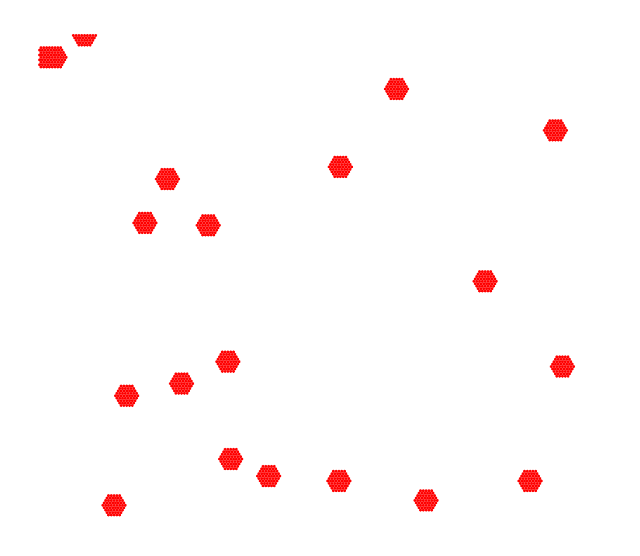

In [88]:
R = 8
phi = 0.1
hotspots = generate_hotspots(species, R, phi)
draw_hexagonal_lattice(hotspots)

In [91]:
def update_with_hotspots_randomly(lattice, hotspots, params, nu):
    rows, cols = lattice.shape
    i = np.random.choice(range(rows))
    j = np.random.choice(range(cols))
    directions_odd = [(-1,  0), (-1, +1), (0, -1), (0, +1), (+1,  0), (+1, +1)]
    directions_even = [(-1, -1), (-1,  0), (0, -1), (0, +1), (+1, -1), (+1,  0)]
    # Visit all neighbors; Choose directions based on the row parity
    directions = directions_even if i % 2 == 0 else directions_odd
    flavor = lattice[i, j]
    if flavor > 0:
        if hotspots[i, j] == 1: growth = (1+nu)*params
        else: growth = params
        for dr, dc in directions:
            ni, nj = i + dr, j + dc
            if 0 <= ni < rows and 0 <= nj < cols:  # Boundary check
                if lattice[ni, nj] == 0:  # If the neighbor is empty
                    if bool(np.random.binomial(1, growth[flavor])): # success in growth
                        if flavor == 1: # wild
                            if bool(np.random.binomial(1, mu)): # mutate
                                lattice[ni, nj] = 2
                            else:
                                lattice[ni, nj] = 1
                        elif flavor == 2: # mutant
                            lattice[ni, nj] = 2
    return lattice

In [126]:
def draw_hexagonal_lattice_with_hotspots(species, hotspots, hex_radius=1):
    """
    Draws a hexagonal lattice with species and overlays hotspots with opacity.

    Parameters:
    - species (2D array): Array where 1 = red, 2 = yellow, 0 = white.
    - hotspots (2D array): Array where 1 = hotspot and 0 = no hotspot.
    - hex_radius (float): Radius of each hexagon.
    """
    # Parameters for hexagon dimensions
    hex_width = np.sqrt(3) * hex_radius
    hex_height = 2 * hex_radius

    # Colors for species
    colors = {0: "white", 1: "red", 2: "yellow"}
    edge_color = "none" if species.shape[0] >= 100 else "black"

    def hexagon(center_x, center_y, radius):
        """Generate the coordinates of a hexagon centered at (center_x, center_y)."""
        angles = np.linspace(np.pi / 6, 2 * np.pi + np.pi / 6, 7)  # Adjust angles for pointy-bottom
        x = center_x + radius * np.cos(angles)
        y = center_y + radius * np.sin(angles)
        return x, y

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw the species lattice
    for i in range(species.shape[0]):  # Loop over rows
        for j in range(species.shape[1]):  # Loop over columns
            center_x = j * hex_width + (i % 2) * (hex_width / 2)  # Offset every other row
            center_y = -i * (3 / 4 * hex_height)  # Offset each row
            
            # Get the color from the species array
            color = colors[species[i, j]]
            
            # Draw the hexagon
            x, y = hexagon(center_x, center_y, hex_radius)
            ax.fill(x, y, color=color, edgecolor=edge_color)
    # Overlay hotspots 
    for i in range(hotspots.shape[0]):  # Loop over rows
        for j in range(hotspots.shape[1]):  # Loop over columns
            if hotspots[i, j] == 1:  # If part of a hotspot
                center_x = j * hex_width + (i % 2) * (hex_width / 2)  # Offset every other row
                center_y = -i * (3 / 4 * hex_height)  # Offset each row
                x, y = hexagon(center_x, center_y, hex_radius)
                ax.fill(x, y, color="black", alpha=0.5, edgecolor=edge_color)  # Overlay with 50% opacity

    # Set aspect ratio and remove axes for better visualization
    ax.set_aspect('equal')
    ax.axis('off')

In [129]:
def draw_hexagonal_lattice_with_hotspots_with_ax(ax, species, hotspots, hex_radius=1):
    """
    Draws a hexagonal lattice with species and overlays hotspots with opacity.

    Parameters:
    - species (2D array): Array where 1 = red, 2 = yellow, 0 = white.
    - hotspots (2D array): Array where 1 = hotspot and 0 = no hotspot.
    - hex_radius (float): Radius of each hexagon.
    """
    # Parameters for hexagon dimensions
    hex_width = np.sqrt(3) * hex_radius
    hex_height = 2 * hex_radius

    # Colors for species
    colors = {0: "white", 1: "red", 2: "yellow"}
    edge_color = "none" if species.shape[0] >= 100 else "black"

    def hexagon(center_x, center_y, radius):
        """Generate the coordinates of a hexagon centered at (center_x, center_y)."""
        angles = np.linspace(np.pi / 6, 2 * np.pi + np.pi / 6, 7)  # Adjust angles for pointy-bottom
        x = center_x + radius * np.cos(angles)
        y = center_y + radius * np.sin(angles)
        return x, y

    # Draw the species lattice
    for i in range(species.shape[0]):  # Loop over rows
        for j in range(species.shape[1]):  # Loop over columns
            center_x = j * hex_width + (i % 2) * (hex_width / 2)  # Offset every other row
            center_y = -i * (3 / 4 * hex_height)  # Offset each row
            
            # Get the color from the species array
            color = colors[species[i, j]]
            
            # Draw the hexagon
            x, y = hexagon(center_x, center_y, hex_radius)
            ax.fill(x, y, color=color, edgecolor=edge_color)
    # Overlay hotspots 
    for i in range(hotspots.shape[0]):  # Loop over rows
        for j in range(hotspots.shape[1]):  # Loop over columns
            if hotspots[i, j] == 1:  # If part of a hotspot
                center_x = j * hex_width + (i % 2) * (hex_width / 2)  # Offset every other row
                center_y = -i * (3 / 4 * hex_height)  # Offset each row
                x, y = hexagon(center_x, center_y, hex_radius)
                ax.fill(x, y, color="black", alpha=0.5, edgecolor=edge_color)  # Overlay with 50% opacity

    # Set aspect ratio and remove axes for better visualization
    ax.set_aspect('equal')
    ax.axis('off')

In [131]:
L = 200
R = 2
phi = 0.1
mu = 0.01
s_list = [0, 0.3, 0.6, 0.9]
nu_list = [0, 2, 4, 6]

In [133]:
species_config = []
hotspots_config = []
for s in s_list:
    for nu in nu_list:
        Gamma_w = 1/(1 + (1+nu) + (1-s) + (1-s)*(1+nu))
        Gamma_m = (1-s)*Gamma_w
        Gamma = np.array([0, Gamma_w, Gamma_m])
        temp = np.zeros((L,L), dtype=int); 
        temp[0,:] = 1
        hotspots = generate_hotspots(temp, R, phi)
        for i in range(int(2e7)):
            temp = update_with_hotspots_randomly(temp, hotspots, Gamma, nu)
        species_config.append(temp)
        hotspots_config.append(hotspots)

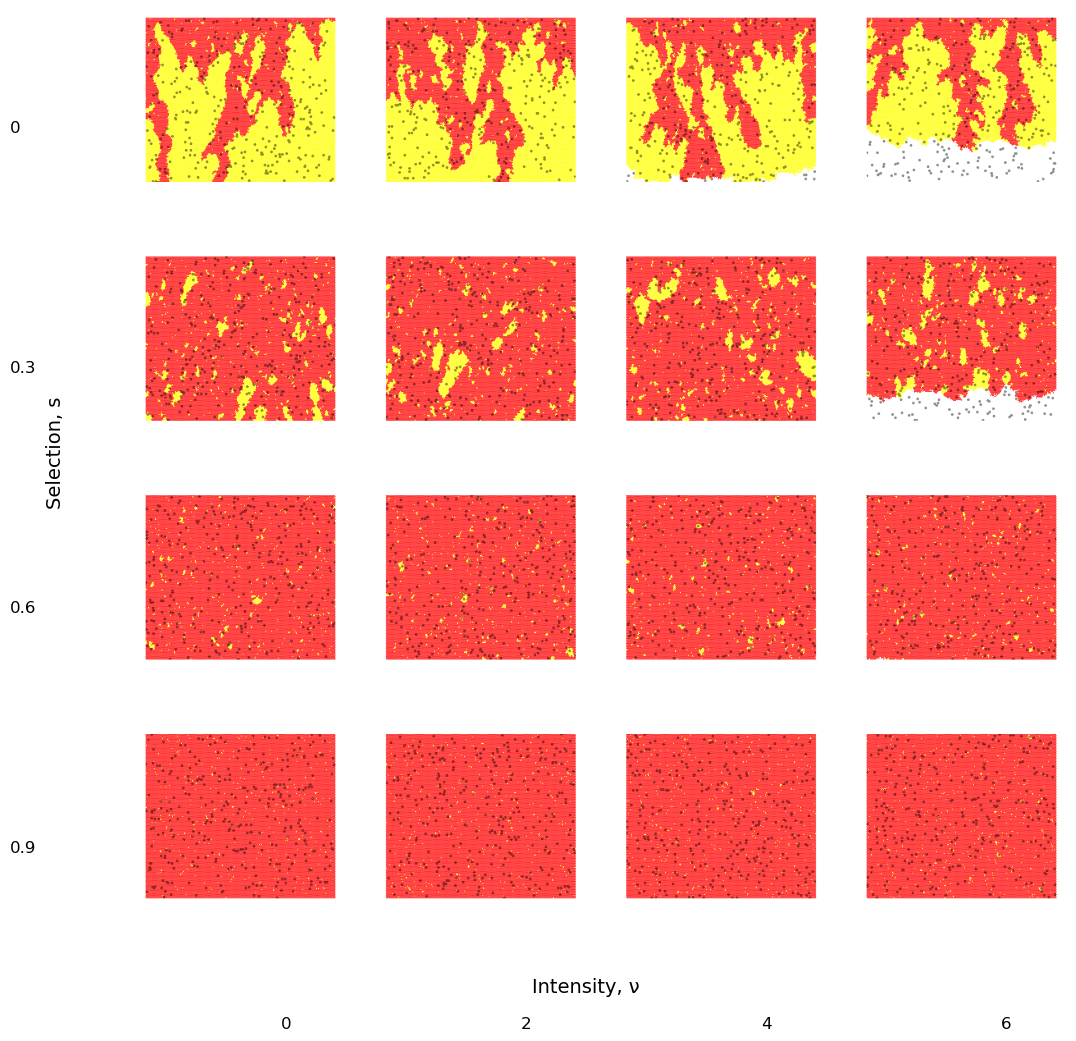

TypeError: Figure.savefig() takes 2 positional arguments but 3 were given

<Figure size 640x480 with 0 Axes>

In [142]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.subplots_adjust(hspace=0.15, wspace=0.15)  # Adjust spacing
for i in range(4):
    for j in range(4):
        idx = i * 4 + j  # Index for the species and hotspot configurations
        ax = axes[i, j]
        draw_hexagonal_lattice_with_hotspots_with_ax(ax, species_config[idx], hotspots_config[idx])

# Add global x-axis and y-axis labels
for i, label in enumerate(nu_list):
    fig.text(0.25 + 0.2 * i, 0.02, str(label), ha='center', fontsize=12)  # x-axis labels
for i, label in enumerate(s_list):
    fig.text(0.02, 0.77 - 0.2 * i, str(label), va='center', fontsize=12)  # y-axis labels

# Add global figure titles
fig.text(0.5, 0.05, "Intensity, ν", ha="center", fontsize=14)
fig.text(0.05, 0.5, "Selection, s", va="center", rotation="vertical", fontsize=14)

plt.show()
plt.savefig(fig, 'fig1_proto.png')

In [112]:
nu = 2
s = 0.5
Gamma_w = 1/(1 + (1+nu) + (1-s) + (1-s)*(1+nu))
Gamma_m = (1-s)*Gamma_w
Gamma = np.array([0, Gamma_w, Gamma_m])
k = np.zeros((L,L), dtype=int); k[0,:] = 1
hotspots = generate_hotspots(temp, R, phi)
for i in range(int(2e7)):
    k = update_with_hotspots_randomly(k, hotspots, Gamma, nu)

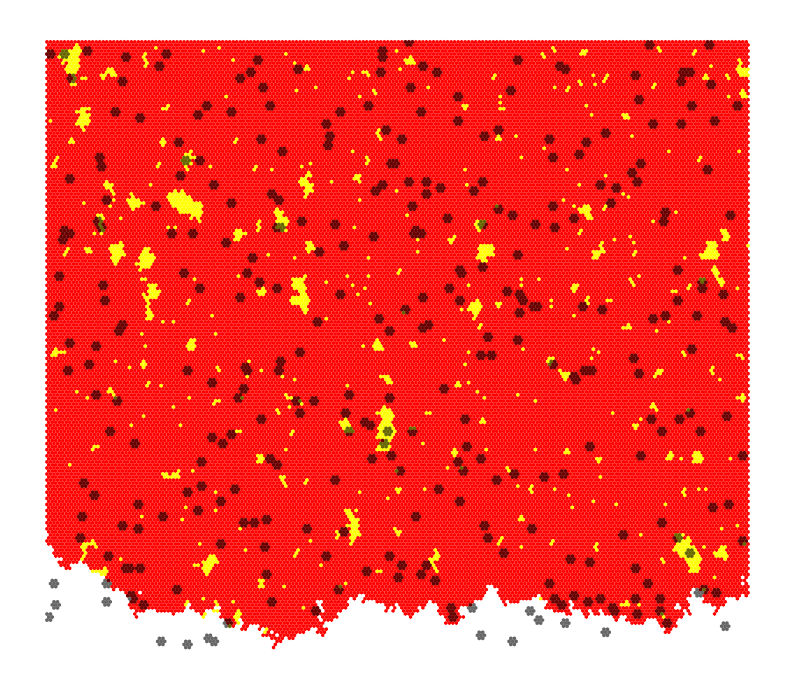

In [125]:
draw_hexagonal_lattice_with_hotspots(k, hotspots)

In [141]:
np.save('fig1_species.dat', species_config)
np.save('fig1_hotspots.dat', hotspots_config)

In [143]:
def generate_hotspots2(form, R, phi):
    """
    Generates hotspots on a hexagonal lattice.
    Parameters:
    - rows (int): Number of rows in the lattice.
    - cols (int): Number of columns in the lattice.
    - R (int): Radius of each hotspot (1 = center only, 2 = up to second shell, etc.).
    - phi (float): Filling fraction (fraction of total lattice covered by hotspots).
    Returns:
    - 2D numpy array (rows x cols): Marked lattice with hotspots.
    """
    rows, cols = form.shape
    lattice = np.zeros((rows, cols), dtype=int)
    num_hotspots = int(phi * rows * cols / (R**2 * 3))

    # Generate unique random hotspot centers
    hotspot_centers = set()
    while len(hotspot_centers) < num_hotspots:
        hotspot_centers.add((np.random.randint(rows), np.random.randint(cols)))

    # Fill the lattice based on radius R
    for cx, cy in hotspot_centers:
        for dr in range(-R, R + 1):
            for dc in range(-R, R + 1):
                # Check hexagonal distance
                if abs(dr) + abs(dc) + abs(-dr - dc) <= R:
                    neighbor_r = cx + dr
                    neighbor_c = cy + dc + (cx % 2) * (dr % 2)  # Adjust for row parity
                    if 0 <= neighbor_r < rows and 0 <= neighbor_c < cols:  # Boundary check
                        lattice[neighbor_r, neighbor_c] = 1

    return lattice


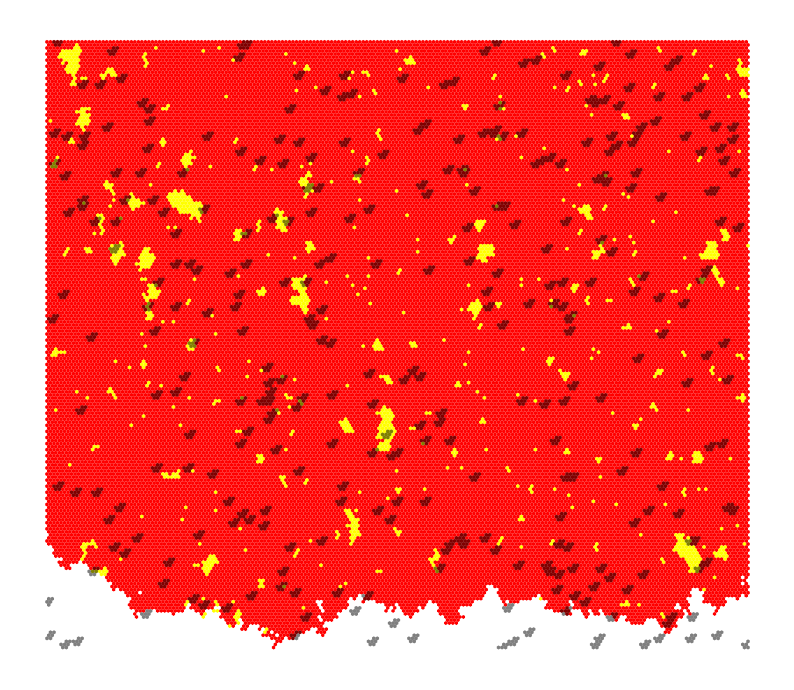

In [144]:
k2 = generate_hotspots2(k, 2, 0.1)
draw_hexagonal_lattice_with_hotspots(k, k2)